<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [148]:
%time

CPU times: user 5 µs, sys: 4 µs, total: 9 µs
Wall time: 22.9 µs


In [149]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
data_T0 = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJET 6/Flipkart/flipkart_com-ecommerce_sample_1050.csv")

print(data_T0.shape)

(1050, 15)


In [151]:
import nltk
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/loicvalenti/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [152]:
data_T0['description'] = data_T0["description"].astype(str)

In [153]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

data_T = pd.DataFrame()
def tokenizer_fct(sentence) :
    #print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text



In [154]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging
import ast

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


In [155]:
category_levels = (data_T0["product_category_tree"]
     .apply(lambda x: ast.literal_eval(x))
     .apply(lambda x: x[0].replace("\\","").replace("'","").split(" >> "))
     .apply(pd.Series)
     .rename(columns= lambda x: "level_"+str(x)))

In [156]:
df = pd.concat([category_levels, data_T0], axis=1)


In [157]:
#df = df[df.groupby('level_1').level_0.transform(len) > 10]

In [158]:
data_T0 = df.drop(columns = ["level_1", "level_2", "level_3","level_4", "level_5", "level_6"])

In [159]:
data_T0.level_0.value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: level_0, dtype: int64

In [160]:
data_T['sentence_bow'] = data_T0['description'].apply(lambda x : transform_bow_fct(x))
data_T['sentence_bow_lem'] = data_T0['description'].apply(lambda x : transform_bow_lem_fct(x))
data_T['sentence_dl'] = data_T0['description'].apply(lambda x : transform_dl_fct(x))
data_T.shape

(1050, 3)

In [161]:
l_cat = list(set(data_T0["level_0"]))
#print("catégories : ", l_cat)
y_cat_num = [(l_cat.index(data_T0.iloc[i]['level_0'])) for i in range(len(data_T0))]

In [162]:
from nltk.tokenize import sent_tokenize, word_tokenize

data_T['length_bow'] = data_T['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_T['length_bow'].max())
data_T['length_dl'] = data_T['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_T['length_dl'].max())


max length bow :  379
max length dl :  632


In [163]:
import umap
import hdbscan

In [164]:
import numpy as np
import seaborn as sns
import scipy.sparse
import sympy
import sklearn.datasets
import sklearn.feature_extraction.text
import umap
import umap.plot
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
#import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
#shap.initjs()

def explainable_clustering(features, labels):
    """
    labels = label_binarize(labels, classes = list(set(labels)))
    clf=RandomForestClassifier()
    clf.fit(features,labels)
    explainer= shap.TreeExplainer(clf)
    shap_values = explainer(features)
    shap.plots.text(shap_values[30, :, "0"])
    """
    #placeholder
    return
    

In [166]:
from sklearn.model_selection import RandomizedSearchCV
import hdbscan
from sklearn.metrics import make_scorer
import warnings

logging.captureWarnings(True)
warnings.filterwarnings('ignore')


In [167]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters

def ARI_fct_KMeans(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    cls = cluster.KMeans(n_clusters=num_labels)
    cls.fit(features)
    #explainable_clustering(features, cls.labels_)
    X_umap = umap.UMAP(n_components=2, metric = "cosine").fit_transform(features)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_umap, cls.labels_


def ARI_fct_UMAP_KMeans(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    X_umap = umap.UMAP(n_components=2, metric = "cosine").fit_transform(features)
    cls = cluster.KMeans(n_clusters=num_labels)
    cls.fit(X_umap)
   # explainable_clustering(features, cls.labels_)
    #X_umap = umap.UMAP(n_components=2, metric = "cosine").fit_transform(X_umap)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_umap, cls.labels_


def ARI_fct_UMAP_Dendro(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    X_umap = umap.UMAP(n_components=2, metric = "cosine").fit_transform(features)
    cls = cluster.AgglomerativeClustering(n_clusters=num_labels)
    cls.fit(X_umap)
    #explainable_clustering(features, cls.labels_)
    #X_umap = umap.UMAP(n_components=2, metric = "cosine").fit_transform(X_umap)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_umap, cls.labels_

def ARI_fct_HDBSCAN(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    hdb = hdbscan.HDBSCAN(gen_min_span_tree=True).fit(features)

    # specify parameters and distributions to sample from
    param_dist = {
        'min_samples': [2, 5, 10,15, 25,30, 35, 40, 45, 50, 55, 60, 100, 200],
                  'min_cluster_size':[2, 5, 10,15, 25,30, 35, 40, 45, 50, 55, 60, 65, 100, 200],
                  'cluster_selection_method' : ['eom','leaf']
                 
                 }

    #validity_scroer = "hdbscan__hdbscan___HDBSCAN__validity_index"
    validity_scorer = make_scorer(hdbscan.validity.validity_index,greater_is_better=True)


    n_iter_search = 50
    random_search = RandomizedSearchCV(hdb
                                       ,param_distributions=param_dist
                                       ,n_iter=n_iter_search
                                       ,scoring=validity_scorer 
                                       ,random_state=42, refit = True)

    random_search.fit(features)


    print(f"Best Parameters {random_search.best_params_}")
    print(f"DBCV score :{random_search.best_estimator_.relative_validity_}")
    #explainable_clustering(features, random_search.labels_)
    X_umap = umap.UMAP(n_components=2, metric = "cosine").fit_transform(features)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, random_search.best_estimator_.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_umap, random_search.best_estimator_.labels_

def ARI_fct_UMAP_HDBSCAN(features) :
    time1 = time.time()
    mapper = umap.UMAP(
    n_components=2).fit(features)
    num_labels=len(l_cat)
    X_umap = mapper.fit_transform(features)
    hdb = hdbscan.HDBSCAN(gen_min_span_tree=True).fit(X_umap)

    # specify parameters and distributions to sample from
    param_dist = {
        'min_samples': [2, 5, 10,15, 25,30, 35, 40, 45, 50, 55, 60,  100, 200],
                  'min_cluster_size':[2, 5, 10,15, 25,30, 35, 40, 45, 50, 55, 60, 100, 200],
                  'cluster_selection_method' : ['eom','leaf']
                 
                 }

    #validity_scroer = "hdbscan__hdbscan___HDBSCAN__validity_index"
    validity_scorer = make_scorer(hdbscan.validity.validity_index,greater_is_better=True)


    n_iter_search = 50
    random_search = RandomizedSearchCV(hdb
                                       ,param_distributions=param_dist
                                       ,n_iter=n_iter_search
                                       ,scoring=validity_scorer 
                                       ,random_state=42, refit = True)

    random_search.fit(X_umap)


    print(f"Best Parameters {random_search.best_params_}")
    print(f"DBCV score :{random_search.best_estimator_.relative_validity_}")
    # Détermination des clusters à partir des données après Tsne 
    #explainable_clustering(features, cls.labels_)
    #X_umap_2 = umap.UMAP(n_components=2, metric = "cosine").fit_transform(X_umap)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, random_search.best_estimator_.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    return ARI, X_umap, random_search.best_estimator_.labels_



# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    
    scatter = sns.scatterplot(data = X_tsne, x = X_tsne[:,0], y = X_tsne[:,1], hue=y_cat_num, palette='Paired')
    ax.get_legend().remove()
    plt.title('Représentation des tweets par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = sns.scatterplot(data = X_tsne, x = X_tsne[:,0], y = X_tsne[:,1], hue=labels, palette='Paired')
    ax.get_legend().remove()
    plt.title('Représentation des tweets par clusters')
    
    plt.show()


In [168]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english',max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df= 0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(data_T[feat])
ctf_fit = ctf.fit(data_T[feat])

cv_transform = cvect.transform(data_T[feat])  
ctf_transform = ctf.transform(data_T[feat])  

CountVectorizer, KMeans: 
-----------------
ARI :  0.1031 time :  3.0


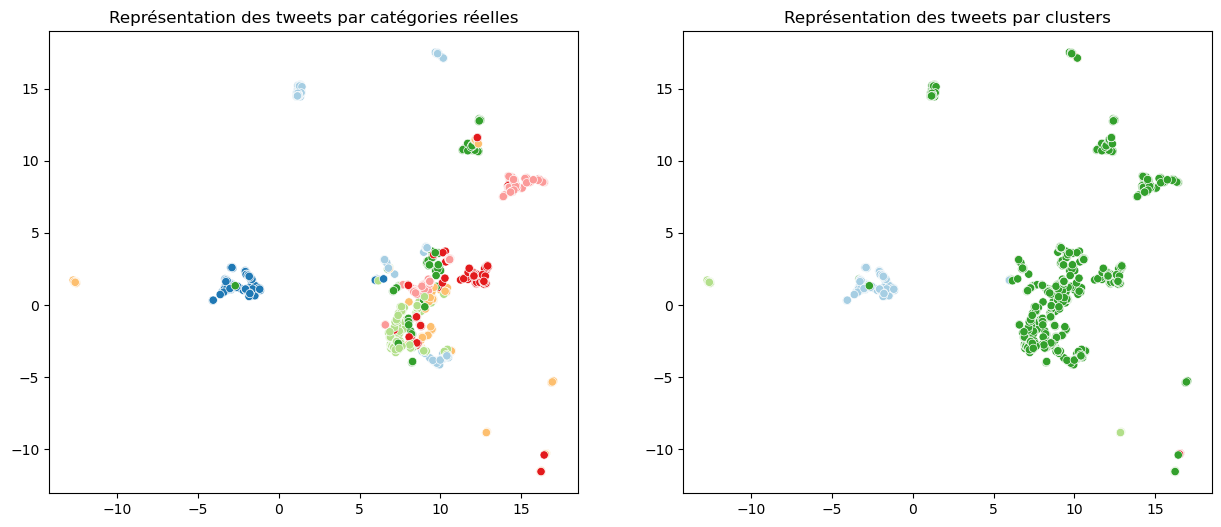

CountVectorizer, UMAP_KMeans: 
-----------------
ARI :  0.294 time :  2.0


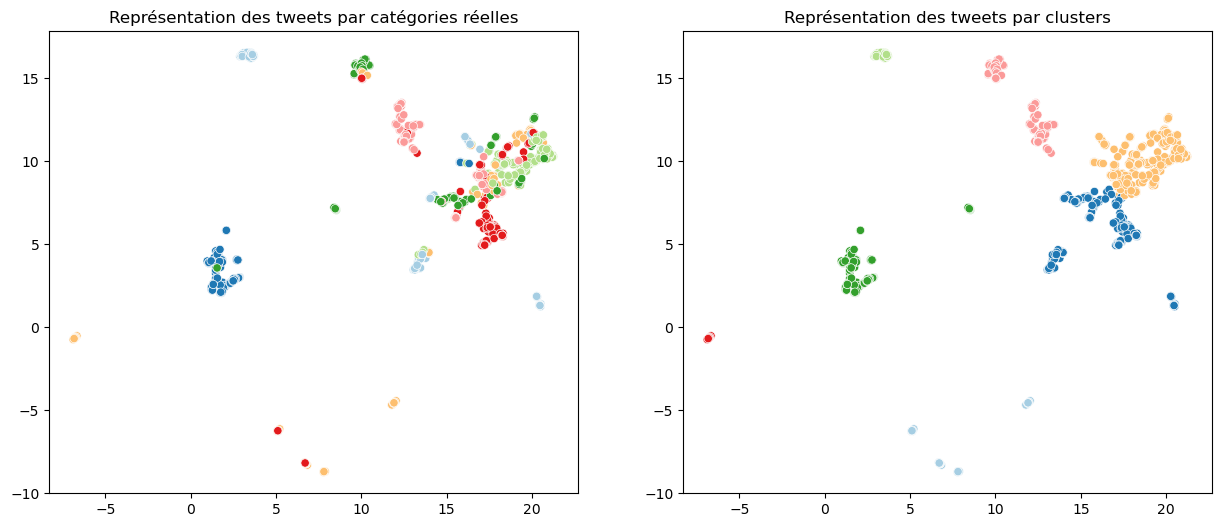

CountVectorizer, Dendro: 
-----------------
ARI :  0.2933 time :  2.0


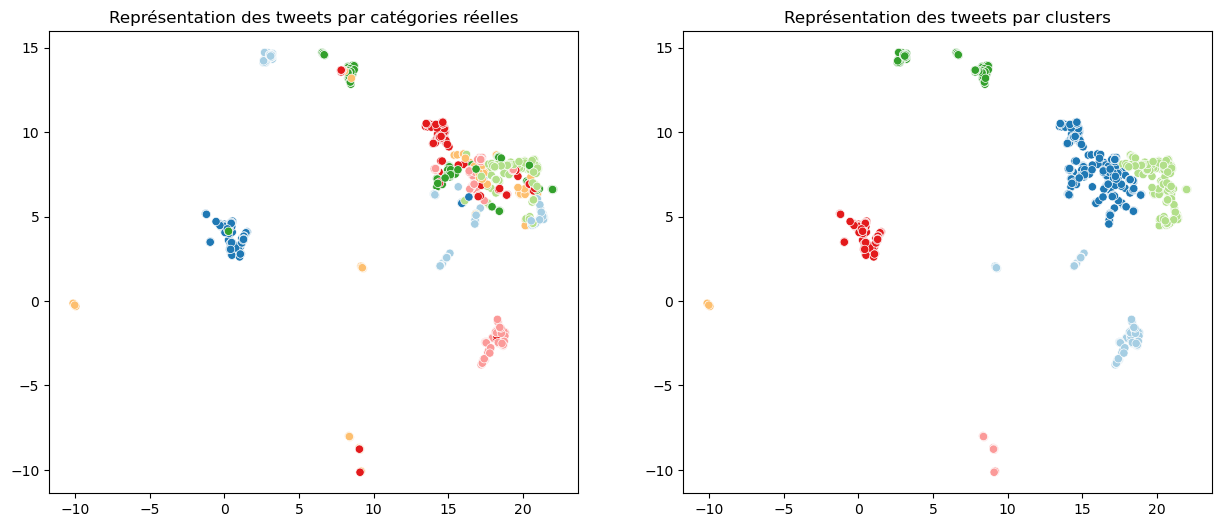

CountVectorizer, HDBSCAN: 
-----------------
Best Parameters {'min_samples': 30, 'min_cluster_size': 55, 'cluster_selection_method': 'eom'}
DBCV score :0.0
ARI :  0.0 time :  25.0


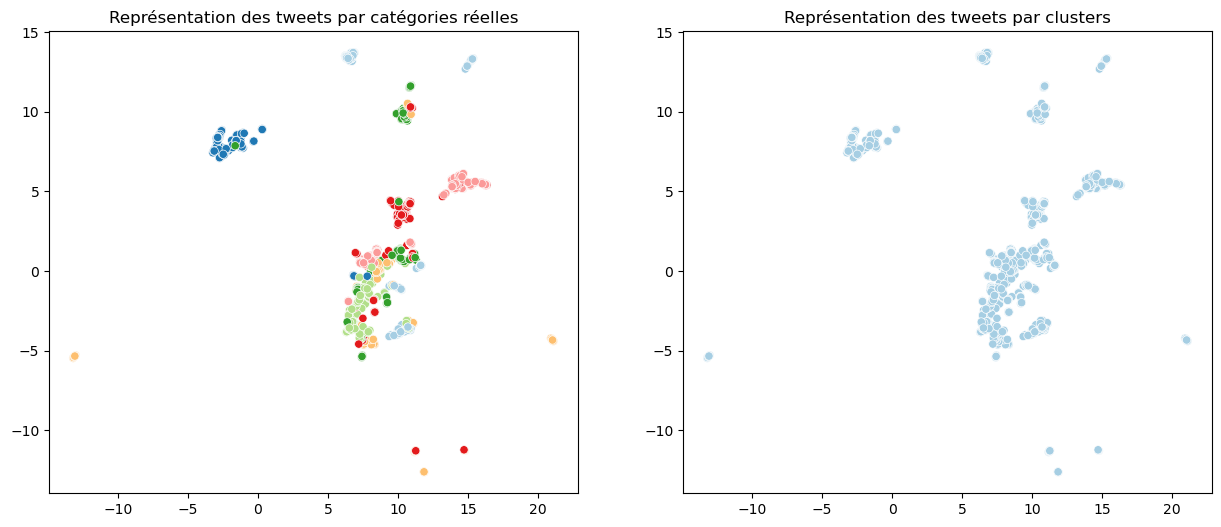

CountVectorizer, UMAP HDBSCAN: 
-----------------
Best Parameters {'min_samples': 45, 'min_cluster_size': 30, 'cluster_selection_method': 'eom'}
DBCV score :0.16668550513135658
ARI :  0.3281 time :  6.0


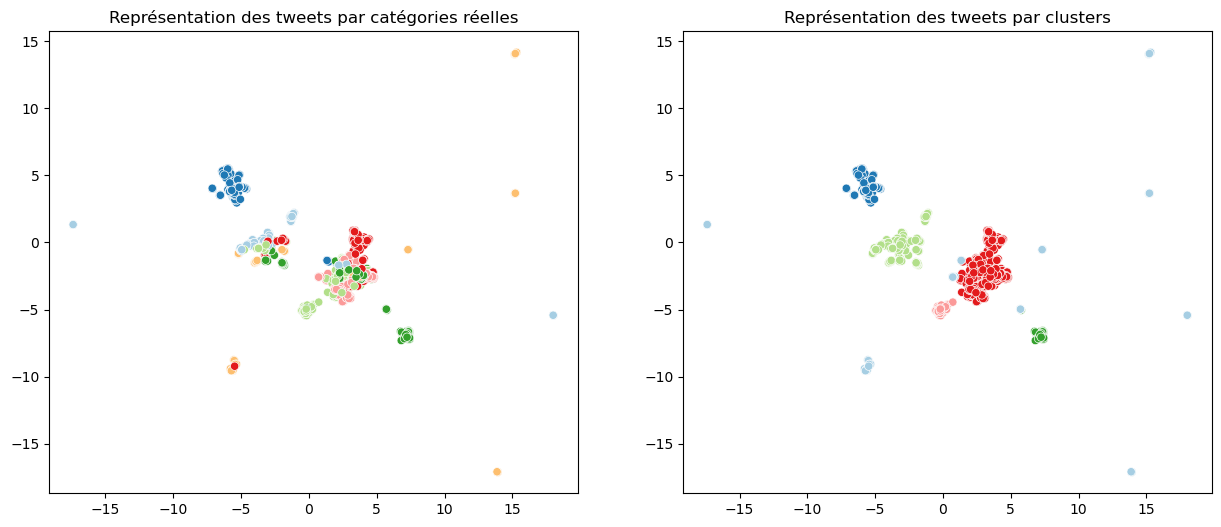

CPU times: user 59.3 s, sys: 3.18 s, total: 1min 2s
Wall time: 37.5 s


In [169]:
%%time
print("CountVectorizer, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(cv_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("CountVectorizer, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(cv_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("CountVectorizer, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(cv_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("CountVectorizer, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(cv_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("CountVectorizer, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(cv_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)


Tf-idf, KMeans: 
-----------------
ARI :  0.2354 time :  2.0


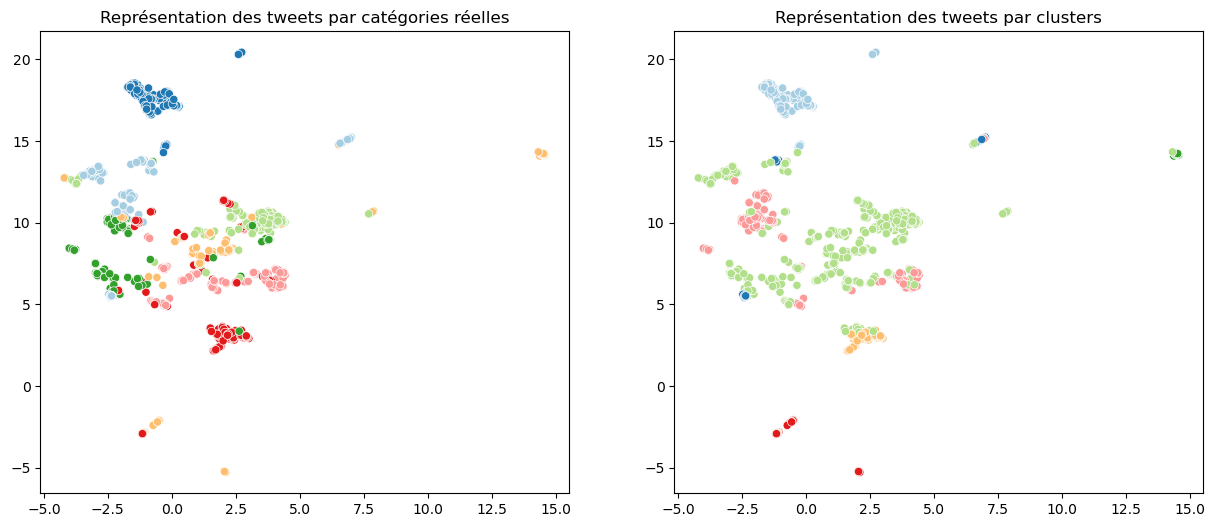

Tf-idf, UMAP_KMeans: 
-----------------
ARI :  0.4962 time :  2.0


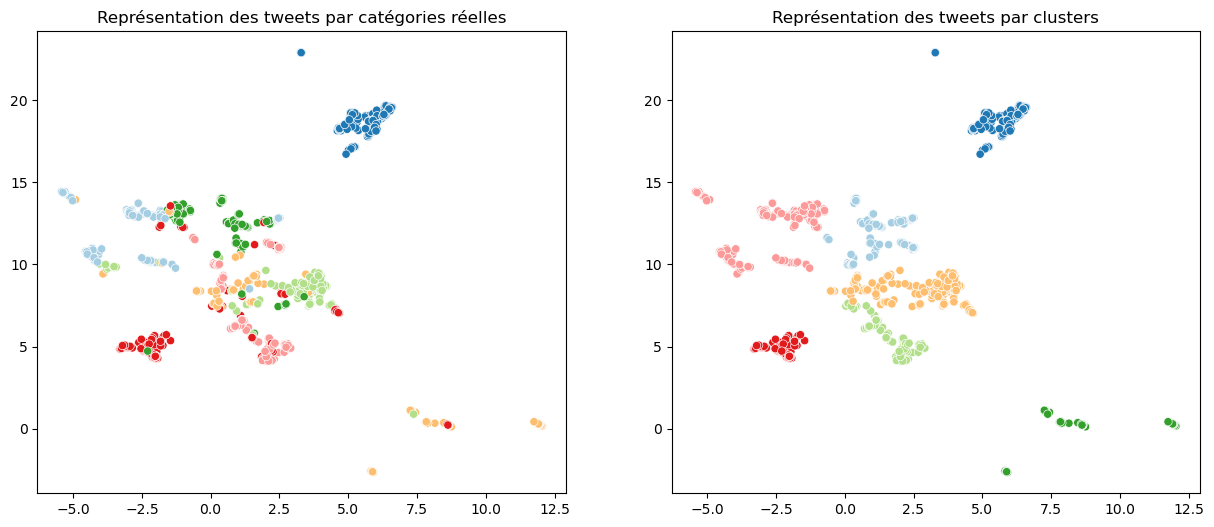

Tf-idf, Dendro: 
-----------------
ARI :  0.3447 time :  2.0


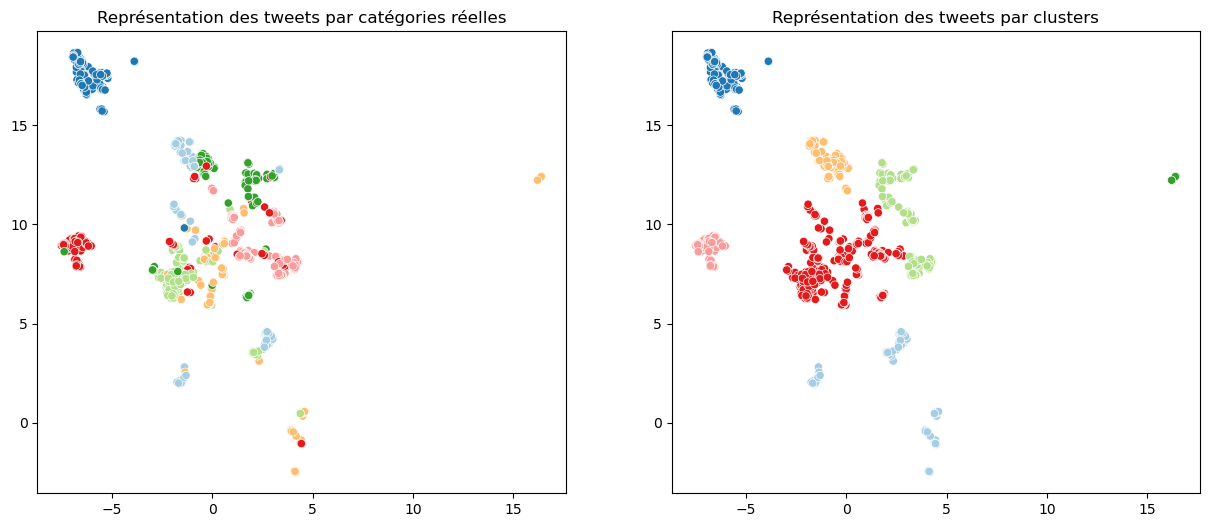

Tf-idf, HDBSCAN: 
-----------------
Best Parameters {'min_samples': 30, 'min_cluster_size': 55, 'cluster_selection_method': 'eom'}
DBCV score :0.0
ARI :  0.0 time :  26.0


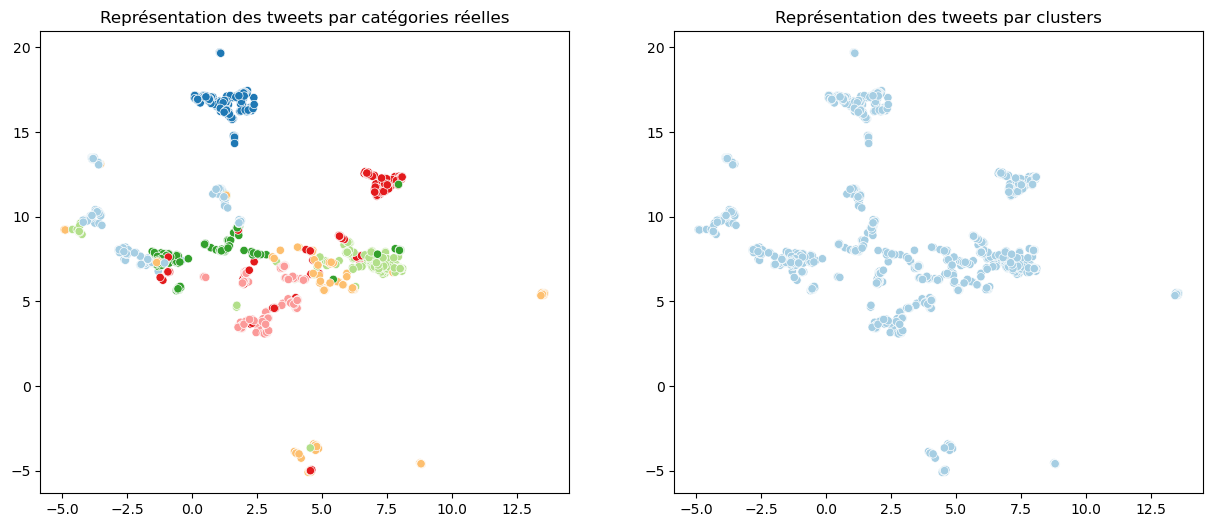

Tf-idf, UMAP HDBSCAN: 
-----------------
Best Parameters {'min_samples': 45, 'min_cluster_size': 30, 'cluster_selection_method': 'eom'}
DBCV score :0.27130303452626275
ARI :  0.3553 time :  6.0


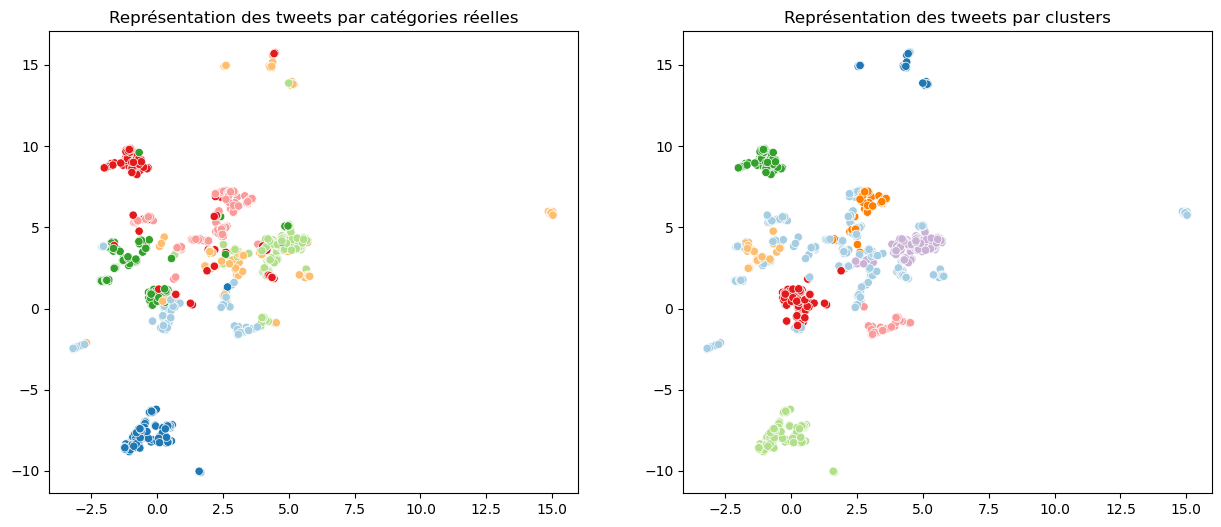

CPU times: user 58.8 s, sys: 2.86 s, total: 1min 1s
Wall time: 37.3 s


In [170]:
%%time
print("Tf-idf, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(ctf_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("Tf-idf, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(ctf_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("Tf-idf, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(ctf_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("Tf-idf, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(ctf_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("Tf-idf, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(ctf_transform)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)


In [171]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [207]:
w2v_size=300
w2v_window=50
w2v_min_count=2
w2v_epochs=100
maxlen = 30 # adapt to length of sentences
sentences = data_T['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [208]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 3347
Word2Vec trained


In [209]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


In [210]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = 0.80
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  0.8
Embedding matrix: (4713, 300)


In [211]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 30)]              0         
                                                                 
 embedding_10 (Embedding)    (None, 30, 300)           1413900   
                                                                 
 global_average_pooling1d_10  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


In [212]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 619us/step


(1050, 300)

Word2Vec, KMeans: 
-----------------
ARI :  0.1653 time :  3.0


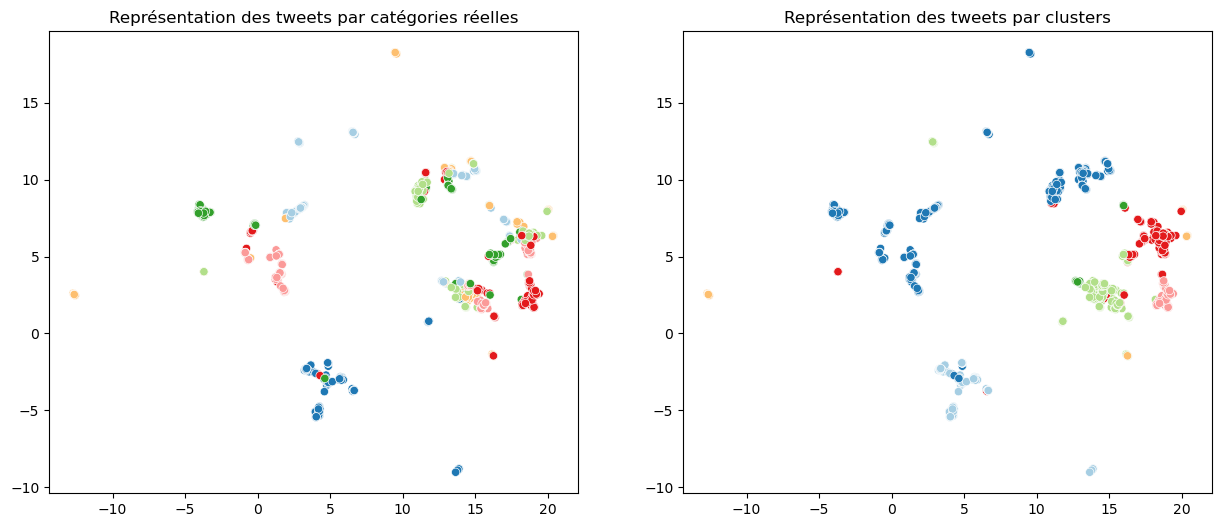

Word2Vec, UMAP_KMeans: 
-----------------
ARI :  0.2203 time :  2.0


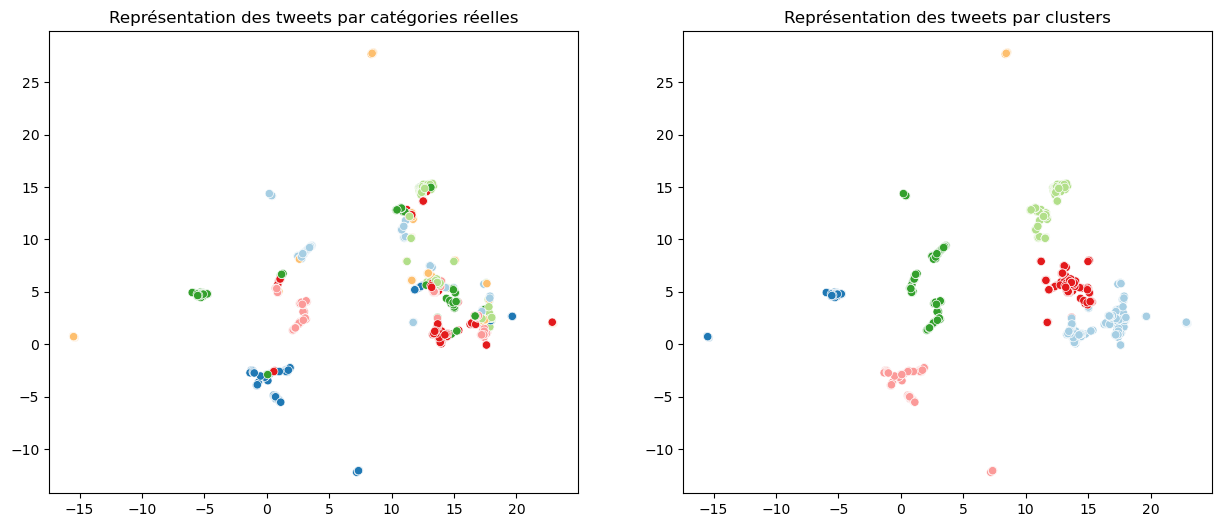

Word2Vec, Dendro: 
-----------------
ARI :  0.2114 time :  2.0


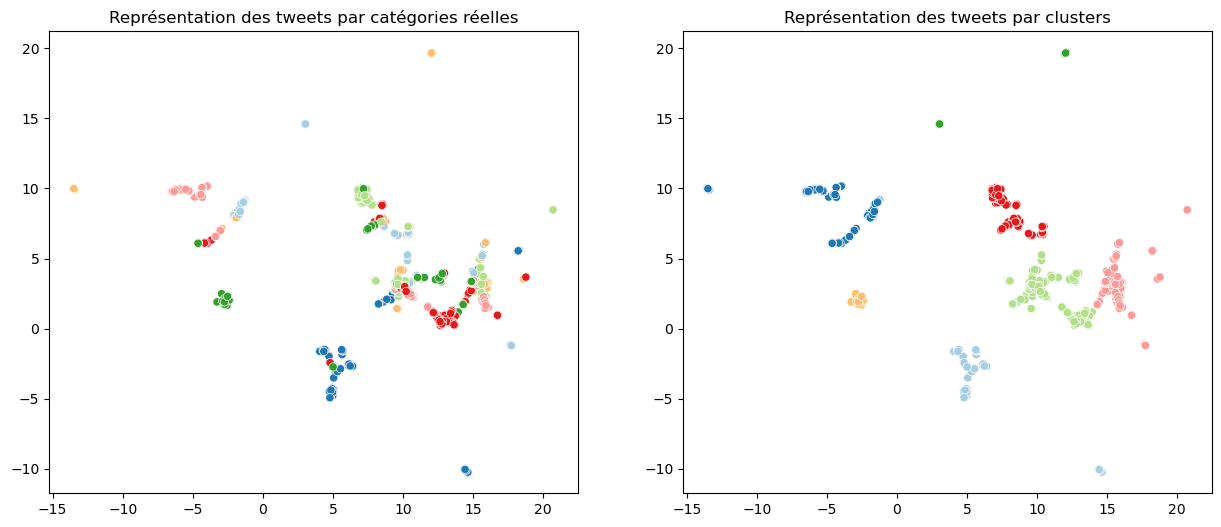

Word2Vec, HDBSCAN: 
-----------------
Best Parameters {'min_samples': 30, 'min_cluster_size': 55, 'cluster_selection_method': 'eom'}
DBCV score :0.054775842073588266
ARI :  0.1229 time :  73.0


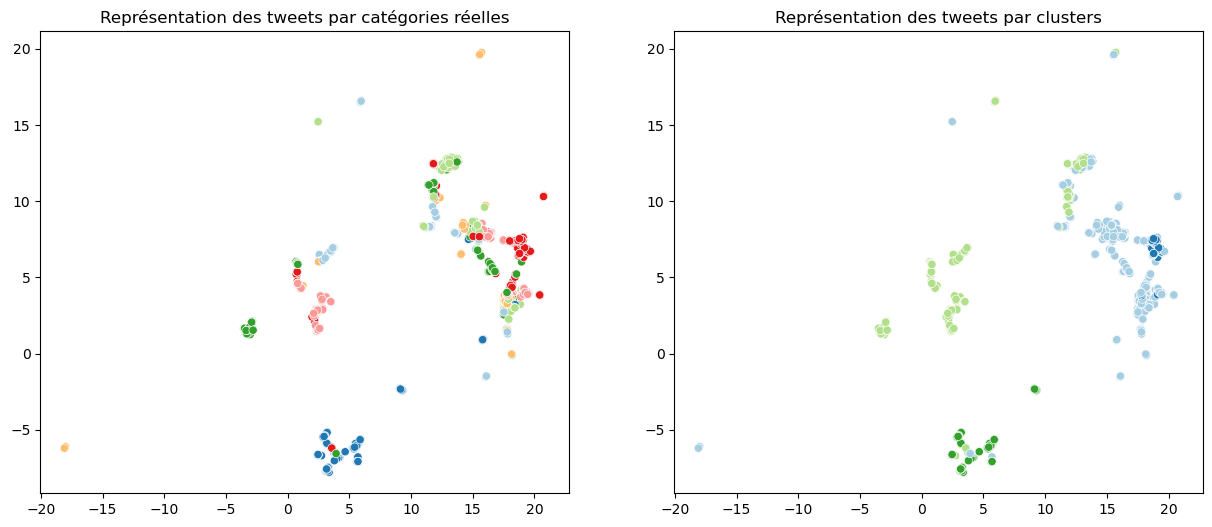

Word2Vec, UMAP HDBSCAN: 
-----------------
Best Parameters {'min_samples': 45, 'min_cluster_size': 30, 'cluster_selection_method': 'eom'}
DBCV score :0.39516581098603387
ARI :  0.2061 time :  7.0


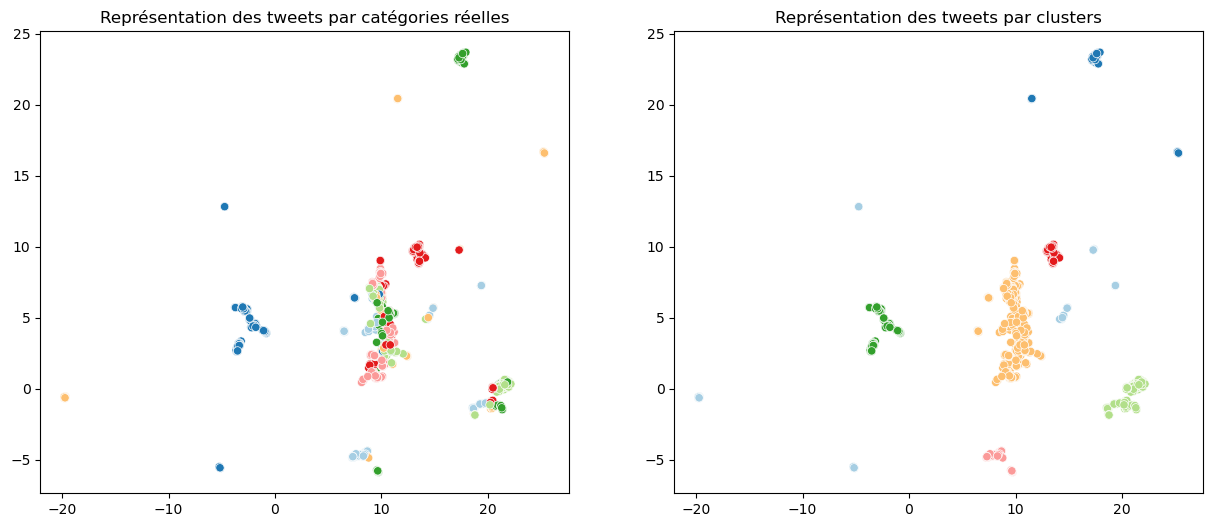

CPU times: user 1min 51s, sys: 3.43 s, total: 1min 54s
Wall time: 1min 28s


In [213]:
%%time
print("Word2Vec, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(embeddings)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("Word2Vec, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(embeddings)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("Word2Vec, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(embeddings)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("Word2Vec, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(embeddings)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("Word2Vec, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(embeddings)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)



In [179]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *



In [180]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
False


In [181]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf", )
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [182]:
max_length = 30
batch_size = 5
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_T['sentence_dl'].to_list()

In [183]:
len(sentences)

1050

In [184]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 243ms/step
temps traitement :  60.0


BERT, KMeans: 
-----------------
ARI :  0.3295 time :  3.0


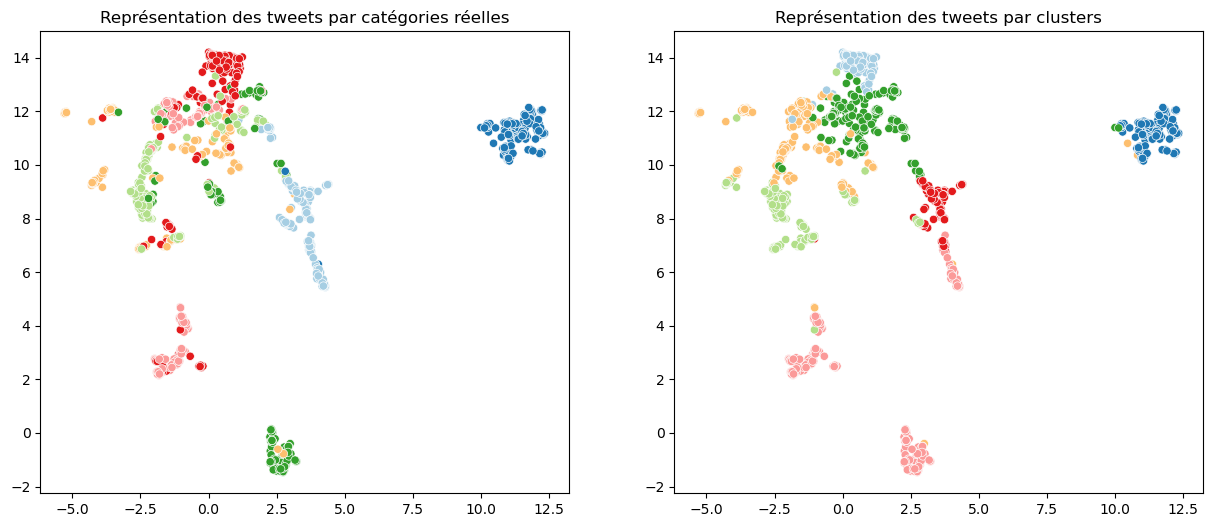

BERT, UMAP_KMeans: 
-----------------
ARI :  0.4123 time :  3.0


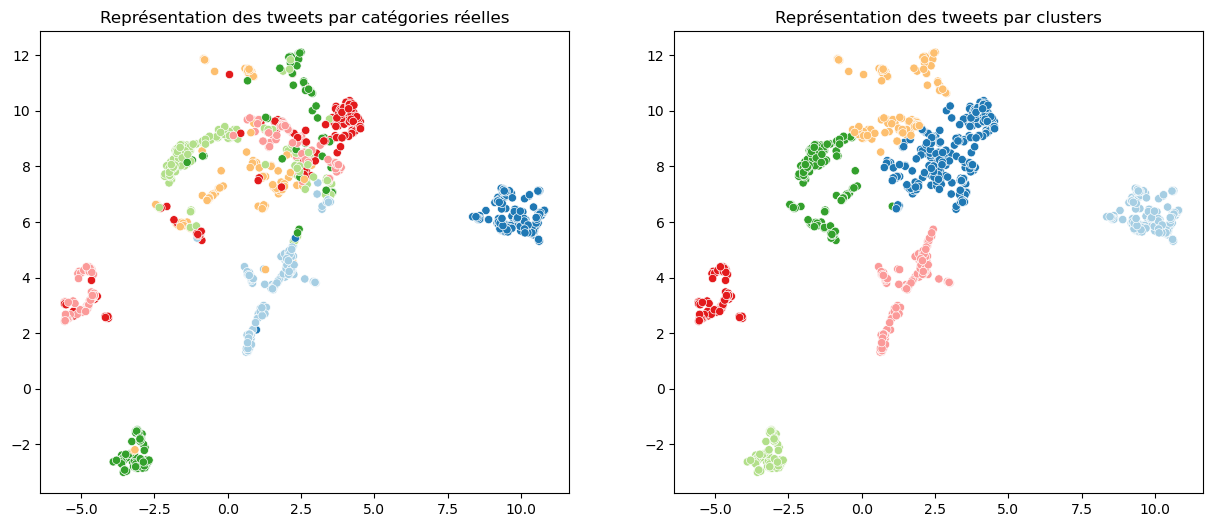

BERT, Dendro: 
-----------------
ARI :  0.4711 time :  2.0


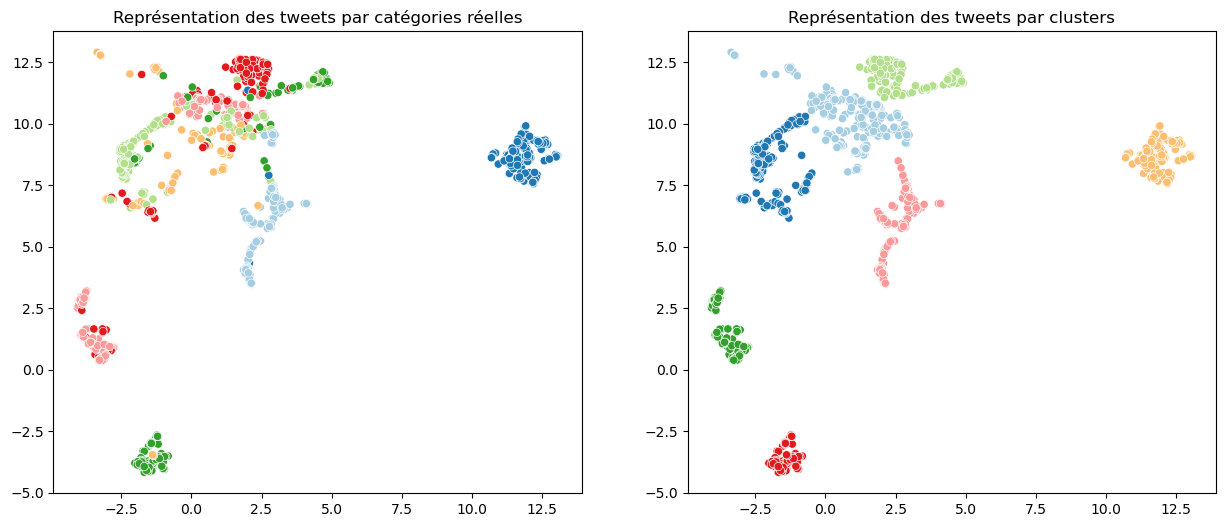

BERT, HDBSCAN: 
-----------------
Best Parameters {'min_samples': 30, 'min_cluster_size': 55, 'cluster_selection_method': 'eom'}
DBCV score :7.839327669964546e-05
ARI :  0.0414 time :  199.0


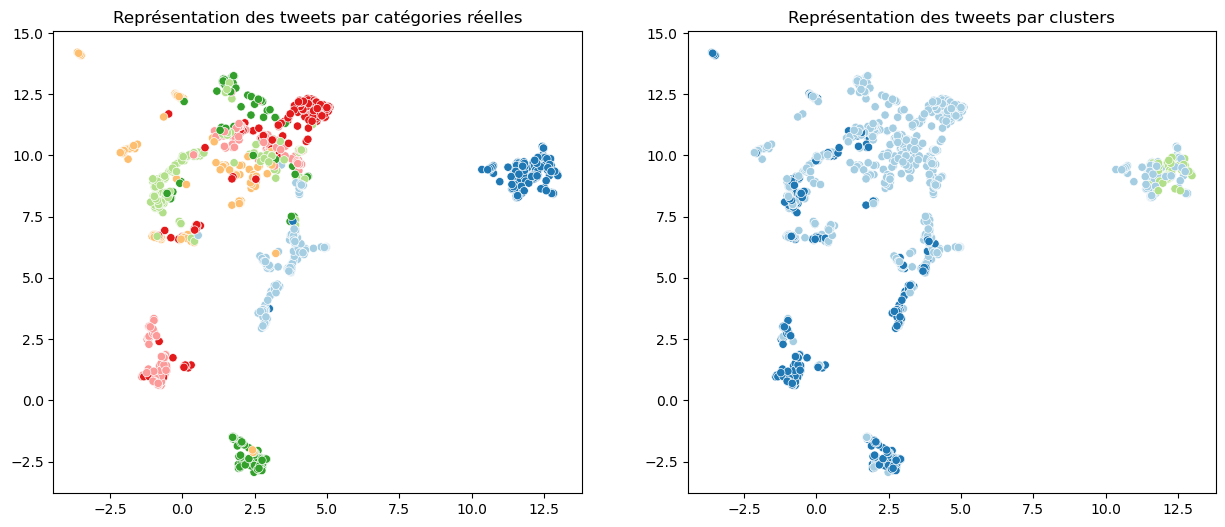

BERT, UMAP HDBSCAN: 
-----------------
Best Parameters {'min_samples': 45, 'min_cluster_size': 30, 'cluster_selection_method': 'eom'}
DBCV score :0.4795390396484516
ARI :  0.1712 time :  7.0


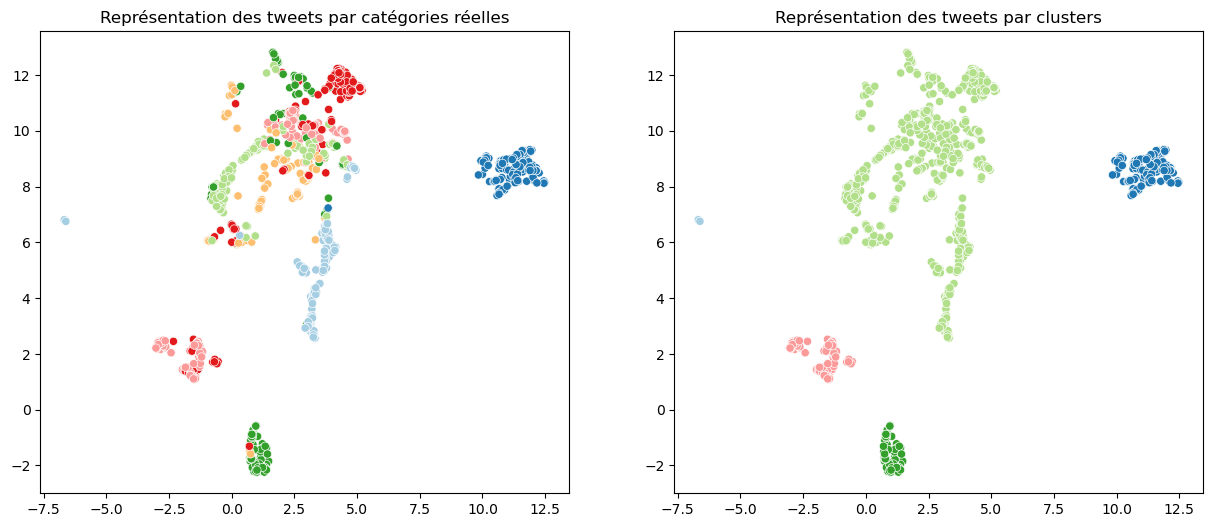

CPU times: user 3min 56s, sys: 3.86 s, total: 4min
Wall time: 3min 35s


In [185]:
%%time
print("BERT, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)





In [89]:
max_length = 20 
batch_size = 10
model_type = 'valhalla/distilbart-mnli-12-1'
model = TFAutoModel.from_pretrained(model_type, from_pt = True)
sentences = data_T['sentence_dl'].to_list()
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

Downloading:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/849M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
%%time
print("BERT, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)







In [ ]:
%%time
max_length = 64
batch_size = 10
model_type = 'cross-encoder/nli-distilroberta-base'
model = TFAutoModel.from_pretrained(model_type, from_pt = True)
sentences = data_T['sentence_dl'].to_list()
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')



print("BERT, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)





In [ ]:
%%time
max_length = 64
batch_size = 10
model_type = 'MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli'
model = TFAutoModel.from_pretrained(model_type, from_pt = True)
sentences = data_T['sentence_dl'].to_list()
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')



print("BERT, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)





In [ ]:
%%time
max_length = 64
batch_size = 10
model_type = 'oigele/Fb_improved_zeroshot'
model = TFAutoModel.from_pretrained(model_type, from_pt = True)
sentences = data_T['sentence_dl'].to_list()
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')



print("BERT, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)




In [ ]:
%%time
max_length = 64
batch_size = 10
model_type = 'nlptown/bert-base-multilingual-uncased-sentiment'
model = TFAutoModel.from_pretrained(model_type, from_pt = True)
sentences = data_T['sentence_dl'].to_list()
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')



print("BERT, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)




In [214]:
%%time
max_length = 30
batch_size = 10
model_type = 'roberta-large'
model = TFAutoModel.from_pretrained(model_type, from_pt = True)
sentences = data_T['sentence_dl'].to_list()
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')



print("BERT, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)




Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
%%time
max_length = 64
batch_size = 10
model_type = 'cartesinus/xlm-r-base-amazon-massive-domain'
model = TFAutoModel.from_pretrained(model_type, from_pt = True)
sentences = data_T['sentence_dl'].to_list()
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')



print("BERT, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)




In [ ]:
%%time
max_length = 30
batch_size = 10
model_type = 'lewtun/xlm-roberta-base-finetuned-marc'
model = TFAutoModel.from_pretrained(model_type, from_pt = True)
sentences = data_T['sentence_dl'].to_list()
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')



print("BERT, KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP_KMeans: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_KMeans(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, Dendro: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_Dendro(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("BERT, UMAP HDBSCAN: ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct_UMAP_HDBSCAN(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)




In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 50
sentences = data_T['sentence_dl'].to_list()